In [139]:
!pip install kagglehub


Defaulting to user installation because normal site-packages is not writeable


In [140]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ndarvind_phiusiil_phishing_url_dataset_path = kagglehub.dataset_download('ndarvind/phiusiil-phishing-url-dataset')

print('Data source import complete.')


Data source import complete.


 *Installing packages*

In [141]:

!pip install xgboost
!pip install --no-cache-dir  scikit-learn numpy scipy
!pip install --no-cache-dir  ydata-profiling pandas numpy scipy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


*Importing Packages*

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time


**CLEANING DATA**

In [143]:
df= pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

df.head()

FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667           0.032650  ...    0   
2               100.0              0.866667           0.028555  ...    0   
3               100.0              1.000000           0.522907  ...    1   
4               100.0              1.000000           0.079963  ...    1   

   Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0       0                 1         34       20      28          119   
1       0                 1         50        9       8           39   
2       0                 1         10        2       7           42   
3       1                 1          3       27      15           22   
4       0                 1        244       15      34           72   

   NoOfEmptyRef  NoOfExternalRef  label  
0             0              124      1  
1             0              217      1  
2             2                5      1  
3             1               31      1  
4             1               85      1  

[5 rows x 56 columns]

In [144]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDigitsInURL',
       'DigitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [145]:
pip install --upgrade ydata-profiling pandas numpy scipy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [146]:
# Try generating a minimal report
try:
    profile = ProfileReport(df, title="Minimal Pandas Profiling Report", minimal=True)
    profile.to_file(output_file="REPORT_minimal.html")
    print("Minimal report generated successfully.")
except Exception as e:
    print(f"Error generating minimal report: {e}")
    # If this minimal report fails with the same error, it's more likely a core library issue (Step 1)
    # If it succeeds, the issue is with one of the more advanced calculations (correlations, interactions).

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 56/56 [00:12<00:00,  4.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Minimal report generated successfully.


In [147]:
# Iterate through each column
for column in df.columns:
    # Get unique values and their counts for the column
    unique_values = df[column].value_counts()

    # Print column name
    print(f"\nUnique values for column '{column}':")

    # Print the unique values table
    print(unique_values)


Unique values for column 'FILENAME':
FILENAME
384822.txt     1
521848.txt     1
31372.txt      1
7969766.txt    1
584840.txt     1
              ..
696732.txt     1
23034.txt      1
23107.txt      1
151578.txt     1
554095.txt     1
Name: count, Length: 235795, dtype: int64

Unique values for column 'URL':
URL
https://roundcube000mondy05.firebaseapp.com/                       2
https://danielcordoba.com.br/officedrive/coco/index.php            2
https://my-site-100076-104558.weeblysite.com/                      2
https://lapis-silent-icicle.glitch.me/naaaafffffcccccuuuuu.html    2
https://accounts-centre-74225.firebaseapp.com/                     2
                                                                  ..
http://www.shprakserf.gq                                           1
https://www.cryptocompare.com                                      1
https://www.diariodealmeria.es                                     1
https://www.town.minamichita.lg.jp                                

In [148]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
FILENAME
URL
Domain
TLD
Title


In [149]:
columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title']

for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(columns=[column])

In [150]:
#df = pd.get_dummies(df, sparse=True)

In [151]:
# Enumerate the values in the "TLD" column
df['TLD'], tld_enum = pd.factorize(df['TLD'])

# Print the enumerated values
print("Enumerated values for column 'TLD':")
print(df['TLD'])

# Print the unique values corresponding to the enumerated values
print("\nUnique values corresponding to the enumerated values:")
print(tld_enum)

Enumerated values for column 'TLD':
0           0
1           1
2           2
3           0
4           3
         ... 
235790      0
235791      2
235792    104
235793     28
235794      0
Name: TLD, Length: 235795, dtype: int64

Unique values corresponding to the enumerated values:
Index(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es',
       ...
       '166', 'ist', 'shoes', '14', 'ntt', '151', 'madrid', '46', 'film',
       'ne'],
      dtype='object', length=695)


In [152]:
df.head()

URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0         31            24           0    0               100.0   
1         23            16           0    1               100.0   
2         29            22           0    2               100.0   
3         26            19           0    0               100.0   
4         33            26           0    3               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933          3   
1              0.666667           0.032650     0.050207          2   
2              0.866667           0.028555     0.064129          2   
3              1.000000           0.522907     0.057606          3   
4              1.000000           0.079963     0.059441          3   

   NoOfSubDomain  ...  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  \
0              1  ...    0       0                 1         34       20   
1              1  ...    0       0                 1         50        9   
2              2  ...    0       0                 1         10        2   
3              1  ...    1       1                 1          3       27   
4              1  ...    1       0                 1        244       15   

   NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  label  
0      28          119             0              124      1  
1       8           39             0              217      1  
2       7           42             2                5      1  
3      15           22             1               31      1  
4      34           72             1               85      1  

[5 rows x 52 columns]

In [153]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDigitsInURL', 'DigitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [154]:
df.corr("pearson") # 'pearson', 'spearman', 'kendall'

URLLength  DomainLength  IsDomainIP       TLD  \
URLLength                    1.000000      0.243091    0.277272  0.078659   
DomainLength                 0.243091      1.000000   -0.041398 -0.064997   
IsDomainIP                   0.277272     -0.041398    1.000000  0.317076   
TLD                          0.078659     -0.064997    0.317076  1.000000   
URLSimilarityIndex          -0.421104     -0.420694   -0.121439 -0.136647   
CharContinuationRate        -0.241104     -0.577425   -0.101307 -0.107877   
TLDLegitimateProb           -0.016656      0.027209   -0.053220 -0.443348   
URLCharProb                 -0.245215     -0.178104   -0.111769 -0.161302   
TLDLength                    0.033339      0.152669   -0.011125  0.007800   
NoOfSubDomain                0.071058      0.399157    0.084619  0.099547   
HasObfuscation               0.161980      0.041643    0.001239  0.009929   
NoOfObfuscatedChar           0.459094      0.011304    0.000354  0.000447   
ObfuscationRatio             0.127472      0.021627    0.000977  0.005141   
NoOfLettersInURL             0.956047      0.277602    0.244300  0.066279   
LetterRatioInURL             0.312632      0.547854   -0.002630 -0.079793   
NoOfDigitsInURL              0.835809      0.131709    0.224703  0.067432   
DigitRatioInURL              0.304379      0.289628    0.161257  0.063198   
NoOfEqualsInURL              0.685091      0.020033    0.288351  0.087661   
NoOfQMarkInURL               0.474901      0.064477    0.389523  0.136080   
NoOfAmpersandInURL           0.500387      0.016320    0.178814  0.052941   
NoOfOtherSpecialCharsInURL   0.782582      0.272930    0.285846  0.115708   
SpacialCharRatioInURL        0.199112      0.182803    0.115484  0.151729   
IsHTTPS                      0.013117     -0.019218   -0.011741 -0.103271   
LineOfCode                  -0.060636     -0.075171   -0.016211 -0.032508   
LargestLineLength            0.045219      0.067131    0.002159  0.005417   
HasTitle                    -0.075456     -0.107133   -0.004602 -0.046022   
DomainTitleMatchScore       -0.215877     -0.296493   -0.052033 -0.148463   
URLTitleMatchScore          -0.193234     -0.328603   -0.054458 -0.136967   
HasFavicon                  -0.094548     -0.148317   -0.030890 -0.050442   
Robots                      -0.073770     -0.082594   -0.028261 -0.048465   
IsResponsive                -0.082549     -0.119737   -0.006481 -0.067650   
NoOfURLRedirect              0.029975      0.019387    0.023497  0.018010   
NoOfSelfRedirect            -0.005168     -0.046803   -0.010231  0.018430   
HasDescription              -0.149104     -0.202821   -0.021518 -0.092456   
NoOfPopup                   -0.010952     -0.012502   -0.002795 -0.001233   
NoOfiFrame                  -0.044875     -0.051687   -0.009741 -0.045615   
HasExternalFormSubmit       -0.035443     -0.038560   -0.007988 -0.020504   
HasSocialNet                -0.180909     -0.216055   -0.046432 -0.087211   
HasSubmitButton             -0.067420     -0.111077   -0.011489 -0.059685   
HasHiddenFields             -0.072551     -0.111882   -0.011962 -0.050762   
HasPasswordField             0.021561      0.009409   -0.008419 -0.030191   
Bank                        -0.031734     -0.039944   -0.015708 -0.043069   
Pay                         -0.057816     -0.065895   -0.013863 -0.072819   
Crypto                      -0.025163     -0.034773   -0.005919 -0.018846   
HasCopyrightInfo            -0.126420     -0.196860   -0.022796 -0.092064   
NoOfImage                   -0.064639     -0.083458   -0.016502 -0.031190   
NoOfCSS                     -0.014507     -0.017596   -0.004149 -0.005790   
NoOfJS                      -0.078643     -0.102216   -0.023126 -0.040603   
NoOfSelfRef                 -0.074722     -0.096712   -0.018981 -0.029178   
NoOfEmptyRef                -0.023206     -0.031673   -0.006793 -0.008785   
NoOfExternalRef             -0.059055     -0.070099   -0.015269 -0.025413   
label                   

In [155]:
# Calculate correlation matrix
correlation_matrix = df.corr('pearson')

# Flatten the correlation matrix into a 1D array excluding the diagonal
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]

# Calculate average correlation
average_correlation = correlation_values.mean()

print("Average correlation:", average_correlation)


Average correlation: 0.06148713319746663


*Drawing correlation matrix before removal of correlated values*


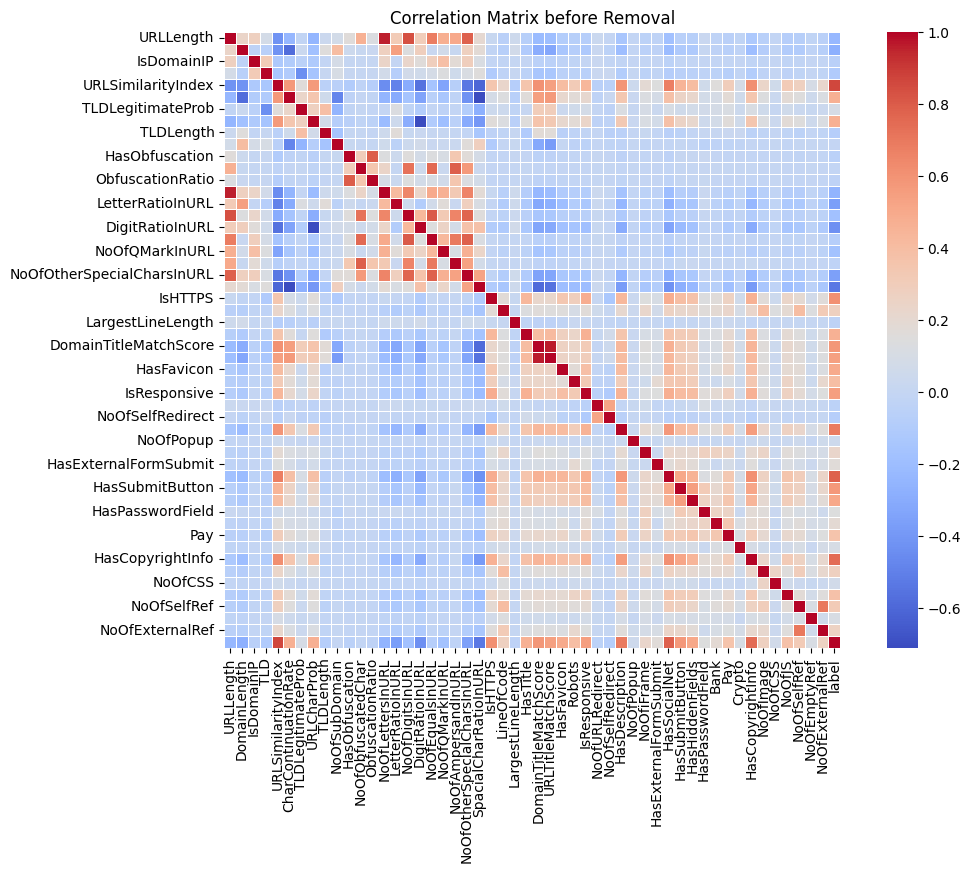

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is also imported
# Calculate the correlation matrix before removing highly correlated features
correlation_matrix_before = df.corr('pearson')

# Plot the correlation matrix after removal
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_before, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix before Removal')
plt.savefig('Correlation Matrix before Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix before Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()


In [157]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'data'
# Iterate over each column in the DataFrame
for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


Chi-square test for URLLength:
Chi-square statistic: 67407.06168244261
P-value: 0.0

Chi-square test for DomainLength:
Chi-square statistic: 36976.8031780716
P-value: 0.0

Chi-square test for IsDomainIP:
Chi-square statistic: 852.260590396482
P-value: 2.3448225852057846e-187

Chi-square test for TLD:
Chi-square statistic: 72412.58849663034
P-value: 0.0

Chi-square test for URLSimilarityIndex:
Chi-square statistic: 232603.227390821
P-value: 0.0

Chi-square test for CharContinuationRate:
Chi-square statistic: 65322.87516163058
P-value: 0.0

Chi-square test for TLDLegitimateProb:
Chi-square statistic: 71998.95018702387
P-value: 0.0

Chi-square test for URLCharProb:
Chi-square statistic: 234441.34570621056
P-value: 3.286006817906975e-25

Chi-square test for TLDLength:
Chi-square statistic: 6820.319022704782
P-value: 0.0

Chi-square test for NoOfSubDomain:
Chi-square statistic: 26713.479728471255
P-value: 0.0

Chi-square test for HasObfuscation:
Chi-square statistic: 646.896659124284
P-valu

*Removing highly correlated features using a correlation matrix*

In [158]:
# Calculate the correlation matrix
correlation_matrix = df.corr('pearson')

# Set a threshold for correlation
threshold = 0.7    # value optimal between 0.7 & 0.9

print("Removed features:")

# Find pairs of features with correlation greater than the threshold
correlated_features = set()
for _ in range(4):
    correlation_matrix = df.corr('pearson').abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                if colname != "label":
                    correlated_features.add(colname)
                    print(colname)
    # Remove highly correlated features
    # Check if the columns exist in the dataframe before dropping them
    existing_columns = [col for col in correlated_features if col in df.columns]
    #df = df.drop(columns=existing_columns)
df = df.drop(columns="TLD")
dfd = df
dfknn = df

Removed features:
ObfuscationRatio
NoOfLettersInURL
NoOfDigitsInURL
NoOfDigitsInURL
DigitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
SpacialCharRatioInURL
URLTitleMatchScore
NoOfExternalRef
ObfuscationRatio
NoOfLettersInURL
NoOfDigitsInURL
NoOfDigitsInURL
DigitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
SpacialCharRatioInURL
URLTitleMatchScore
NoOfExternalRef
ObfuscationRatio
NoOfLettersInURL
NoOfDigitsInURL
NoOfDigitsInURL
DigitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
SpacialCharRatioInURL
URLTitleMatchScore
NoOfExternalRef
ObfuscationRatio
NoOfLettersInURL
NoOfDigitsInURL
NoOfDigitsInURL
DigitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOther

In [159]:
dfd.head()

URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
0         31            24           0               100.0   
1         23            16           0               100.0   
2         29            22           0               100.0   
3         26            19           0               100.0   
4         33            26           0               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933          3   
1              0.666667           0.032650     0.050207          2   
2              0.866667           0.028555     0.064129          2   
3              1.000000           0.522907     0.057606          3   
4              1.000000           0.079963     0.059441          3   

   NoOfSubDomain  HasObfuscation  ...  Pay  Crypto  HasCopyrightInfo  \
0              1               0  ...    0       0                 1   
1              1               0  ...    0       0                 1   
2              2               0  ...    0       0                 1   
3              1               0  ...    1       1                 1   
4              1               0  ...    1       0                 1   

   NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  \
0         34       20      28          119             0              124   
1         50        9       8           39             0              217   
2         10        2       7           42             2                5   
3          3       27      15           22             1               31   
4        244       15      34           72             1               85   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 51 columns]

In [160]:
print(df.columns.tolist())


['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDigitsInURL', 'DigitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [161]:
dfd.shape

(235795, 51)

In [162]:
dfd.describe()

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050747       2.000000   
50%                1.000000           0.079963       0.057970       3.000000   
75%                1.000000           0.522907       0.062875       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  ...            Pay         Crypto  \
count  235795.000000   235795.000000  ...  235795.000000  235795.000000   
mean        1.164758        0.002057  ...       0.237007       0.023474   
std         0.600969        0.045306  ...       0.425247       0.151403   
min         0.000000        0.000000  ...       0.000000       0.000000   
25%         1.000000        0.000000  ...       0.000000       0.000000   
50%         1.000000        0.000000  ...       0.000000       0.000000   
75%         1.000000        0.000000  ...       0.000000       0.000000   
max        10.000000        1.000000  ...       1.000000       1.000000   

       HasCopyrightInfo      NoOfImage        NoOfCSS         NoOfJS  \
count     235795.000000  235795.000000  235795.000000  235795.000000   
mean           0.486775      26.075689       6.333111      10.522305   
std            0.499826      79.411815      74.866296      22.312192   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       8.000000       2.000000       6.000000   
75%            1.000000      29.000000       8.000000      15.000000   
max            1.000000    8956.000000   35820.000000    6957.000000   

         NoOfSelfRef   NoOfEmptyRef  NoOfExternalRef          label  
count  235795.000000  235795.000000    235795.000000  235795.000000  
mean       65.071113       2.377629        49.262516       0.571895  
std       176.687539      17.641097       161.027430       0.494805  
min         0.000000       0.000000         0.000000       0.000000  
25%         0.000000       0.000000         1.000000       0.000000  
50%        12.000000       0.000000        10.000000       1.000000  
75%        88.000000       1.000000        57.000000       1.000000  
max     27397.000000    4887.000000     27516.000000       1.000000  

[8 rows x 51 columns]

*Drawing correlation matrix after removal of correlated values*

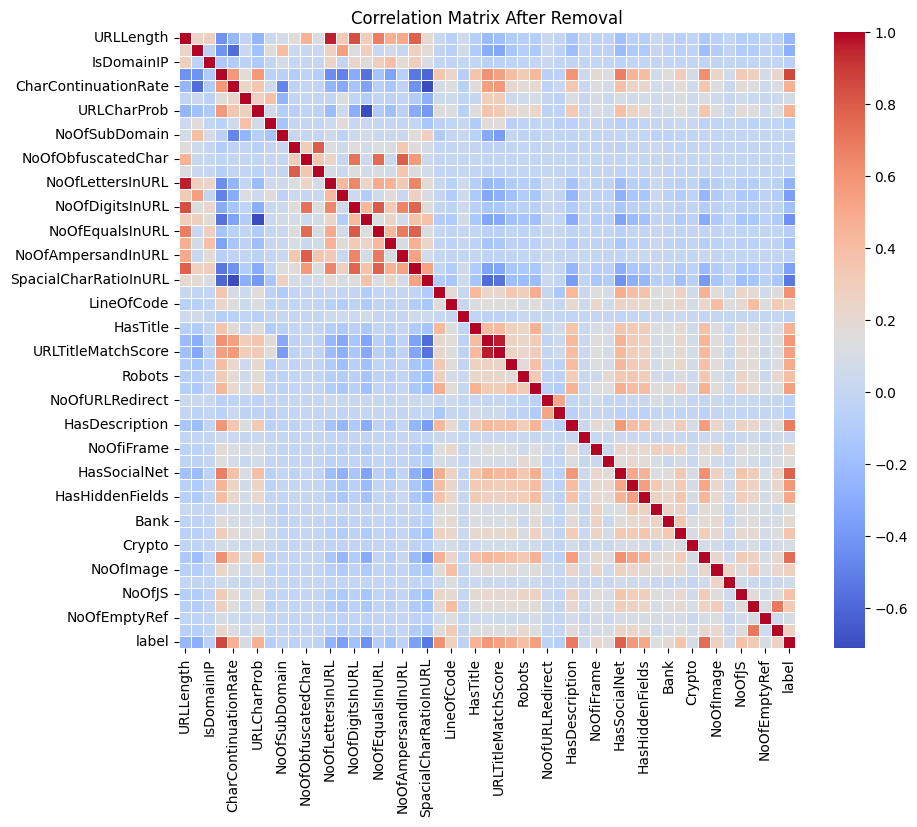

In [163]:
# Calculate the correlation matrix after removing highly correlated features
correlation_matrix_after = dfd.corr()

# Plot the correlation matrix after removal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix After Removal')
plt.savefig('Correlation Matrix After Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix After Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()

RANDOM FOREST ALGORITHM

In [164]:
X = dfd.drop(columns=['label'])
y = dfd['label']

In [165]:
X.head()

URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
0         31            24           0               100.0   
1         23            16           0               100.0   
2         29            22           0               100.0   
3         26            19           0               100.0   
4         33            26           0               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933          3   
1              0.666667           0.032650     0.050207          2   
2              0.866667           0.028555     0.064129          2   
3              1.000000           0.522907     0.057606          3   
4              1.000000           0.079963     0.059441          3   

   NoOfSubDomain  HasObfuscation  ...  Bank  Pay  Crypto  HasCopyrightInfo  \
0              1               0  ...     1    0       0                 1   
1              1               0  ...     0    0       0                 1   
2              2               0  ...     0    0       0                 1   
3              1               0  ...     0    1       1                 1   
4              1               0  ...     1    1       0                 1   

   NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  
0         34       20      28          119             0              124  
1         50        9       8           39             0              217  
2         10        2       7           42             2                5  
3          3       27      15           22             1               31  
4        244       15      34           72             1               85  

[5 rows x 50 columns]

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Handle NaNs Consistently (CRITICAL)
#    Choose a strategy (e.g., mean, median, or constant like 0)
#    Fit ONLY on X_train, then transform both X_train and X_test
imputer = SimpleImputer(strategy='mean') # Or 'median', 'constant' with fill_value=0
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use the SAME imputer

# 3. Scale Data AFTER Imputation
#    Fit ONLY on the imputed X_train, then transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed) # Use the SAME scaler

# --- Save the Imputer and Scaler ---
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Imputer and Scaler saved.")

✅ Imputer and Scaler saved.


In [167]:
# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


*Visualisation of a tree example of the forest + final forest*

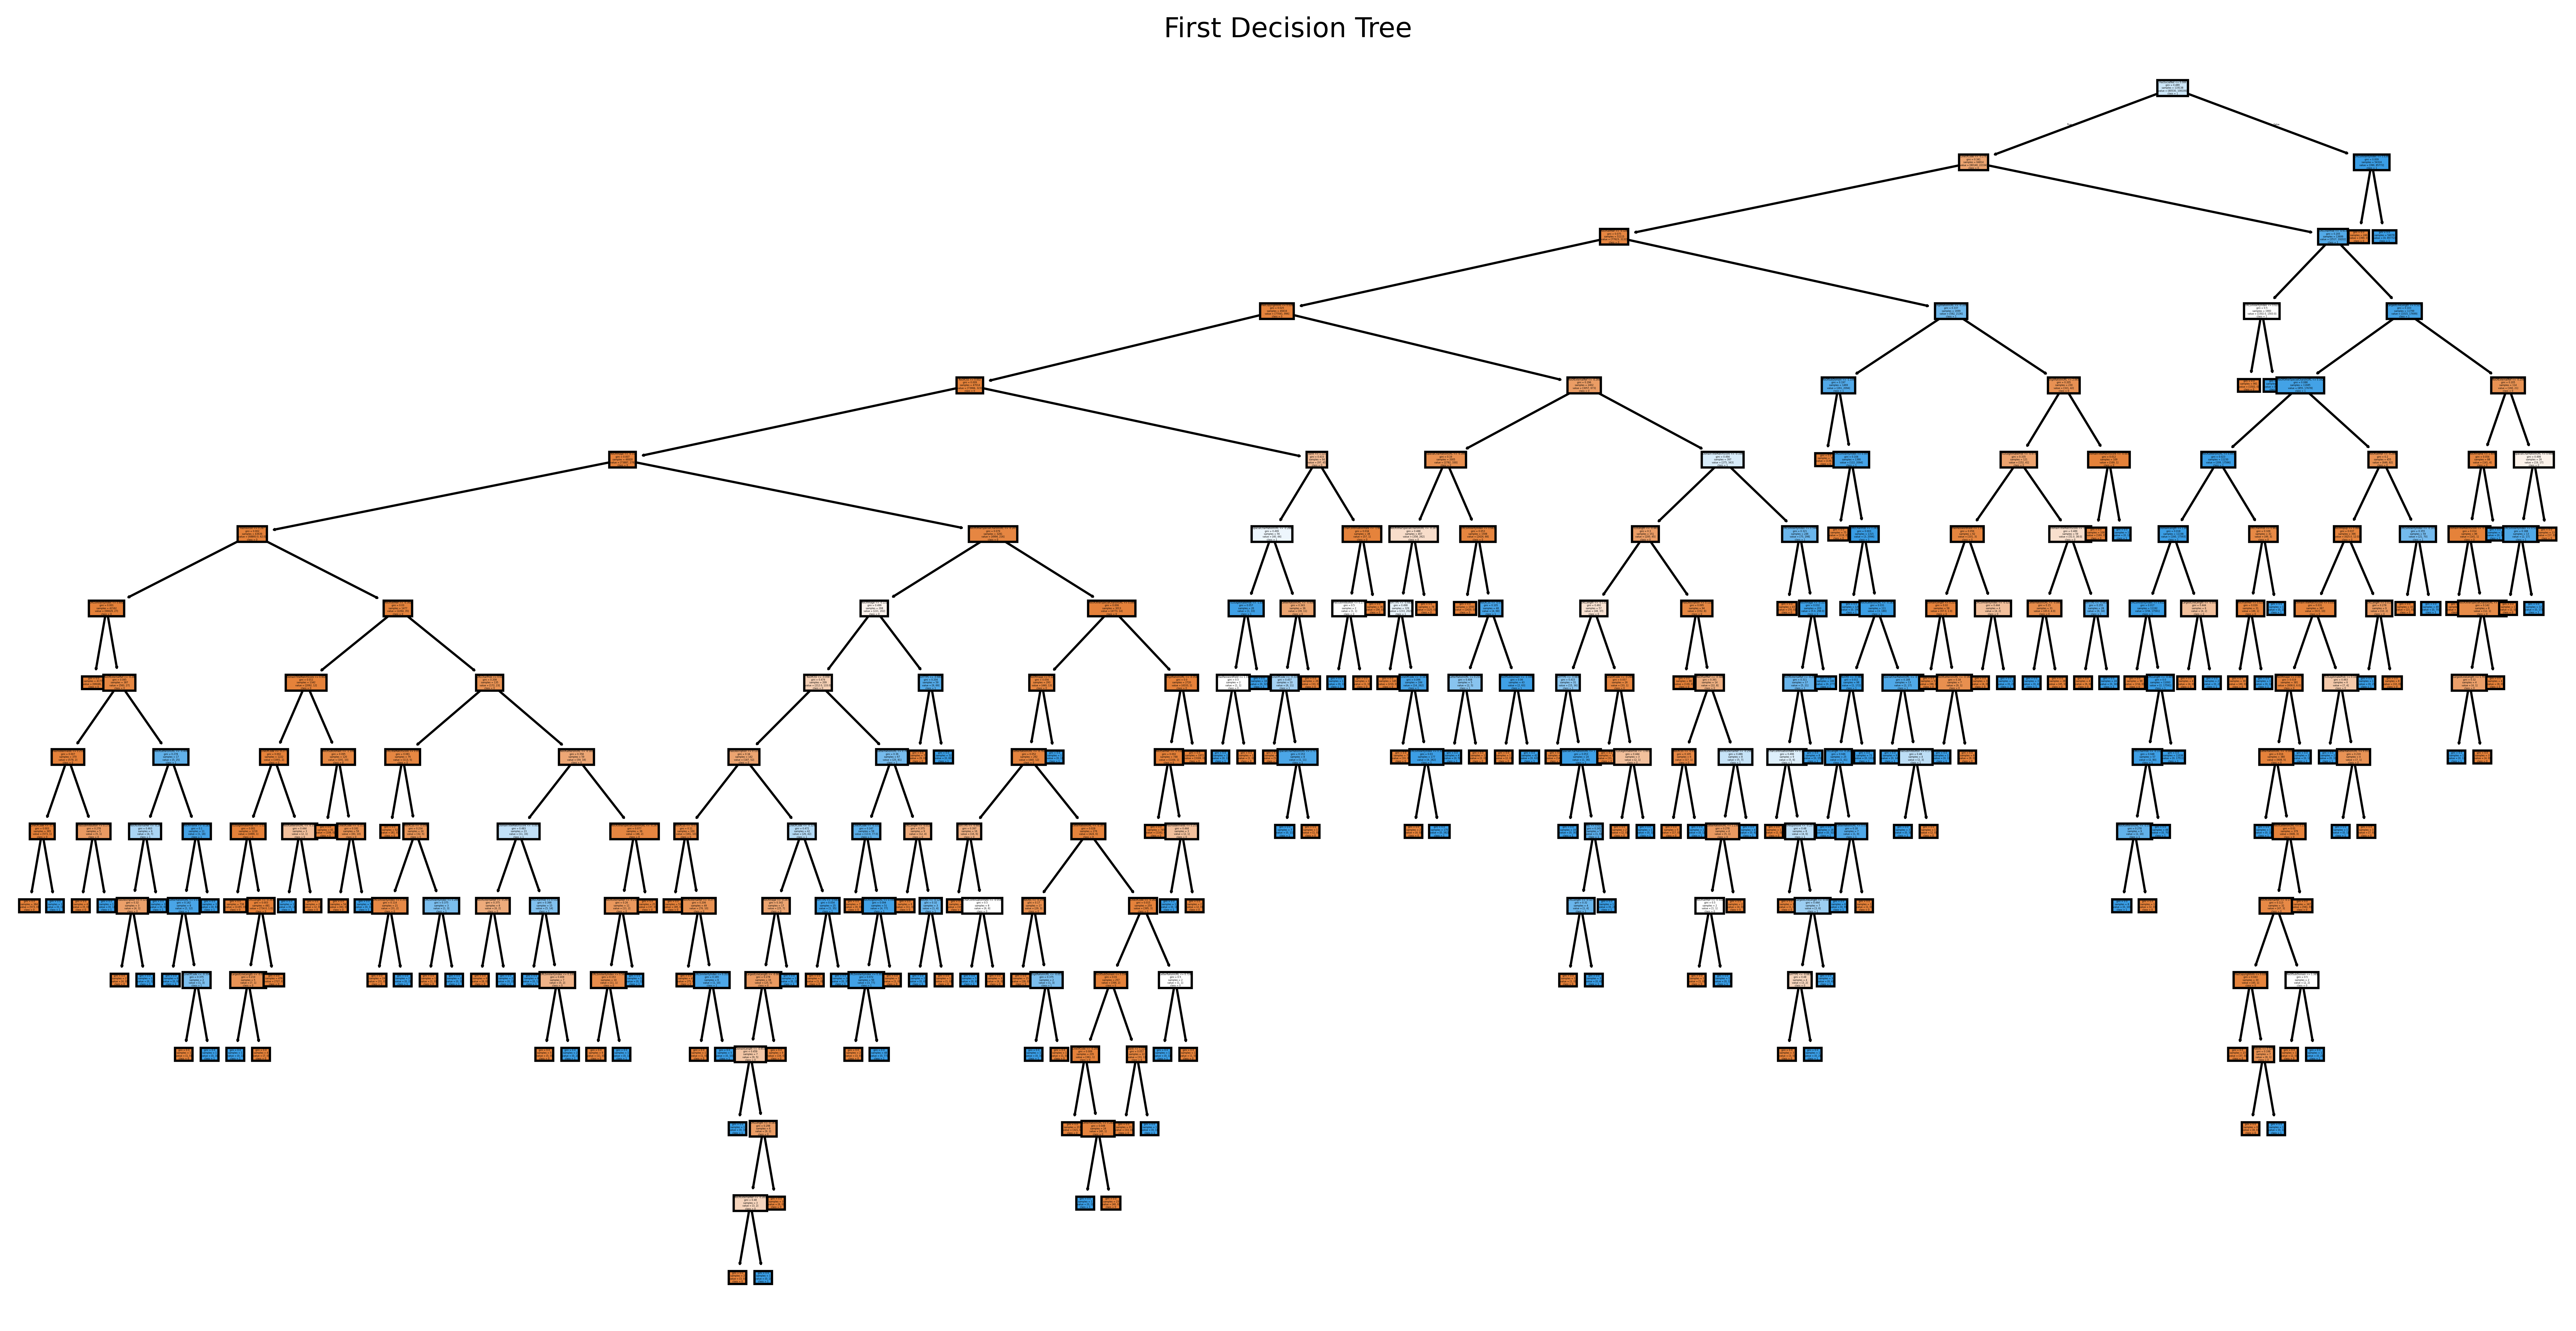

In [168]:
# Extracting the first tree from the forest
tree = rf_classifier.estimators_[0]

# Convert class names to strings
class_names = [str(class_name) for class_name in rf_classifier.classes_]

# Get feature names from the DataFrame columns
feature_names = df.columns.tolist()  # Assuming df is your DataFrame

# Plotting the first tree
plt.figure(figsize=(20,10),dpi=600)
plot_tree(tree, filled=True, feature_names=feature_names, class_names=class_names)
plt.title('First Decision Tree')
plt.show()

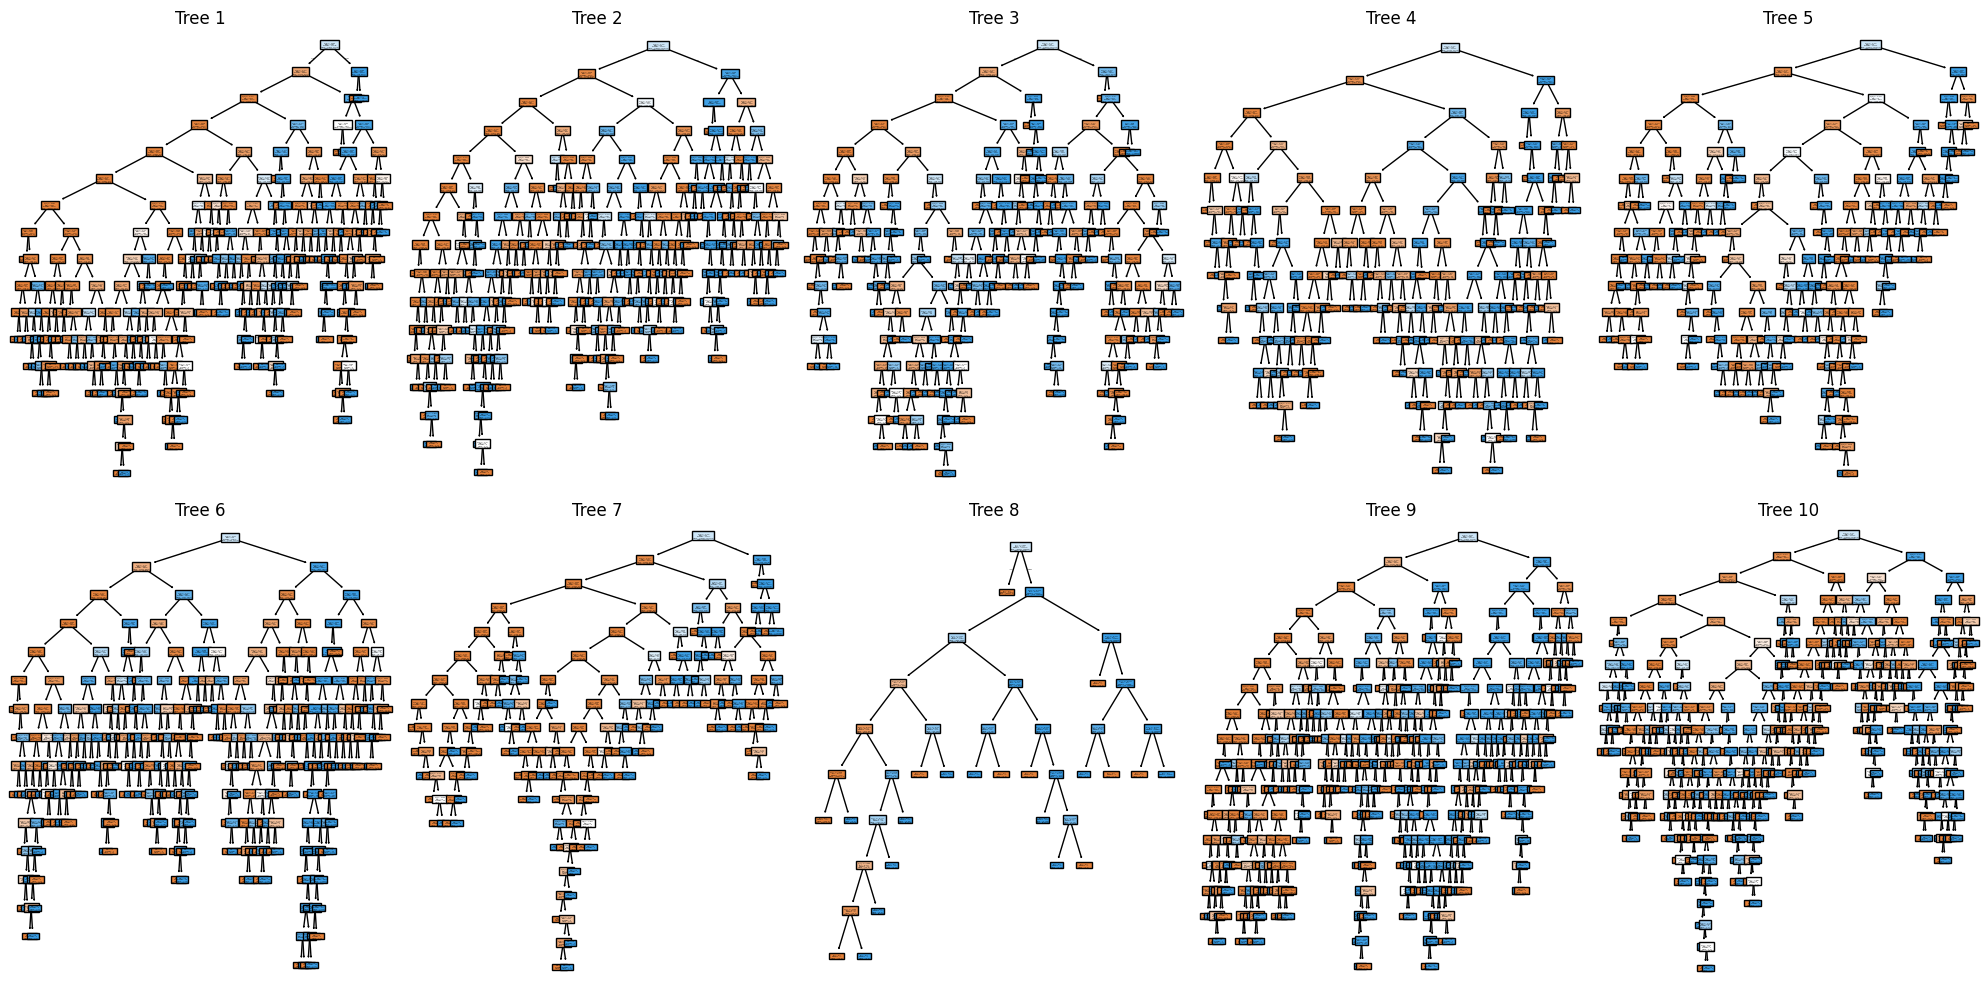

In [169]:
plt.figure(figsize=(20,10))
for i, tree in enumerate(rf_classifier.estimators_[:10]):  # Plot a maximum of 10 trees
    plt.subplot(2, 5, i + 1)
    plot_tree(tree, filled=True, class_names=['No Phishing', 'Phishing'])
    plt.title(f'Tree {i+1}')
plt.tight_layout()
plt.show()


In [170]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=20))

Classification Report:
                      precision    recall  f1-score   support

                   0  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     20124
                   1  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     27035

            accuracy                      1.00000000000000000000     47159
           macro avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159
        weighted avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159



In [171]:
# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[20124     0]
 [    0 27035]]


*PLOTTING THE Random Forest classifier RESULTS*

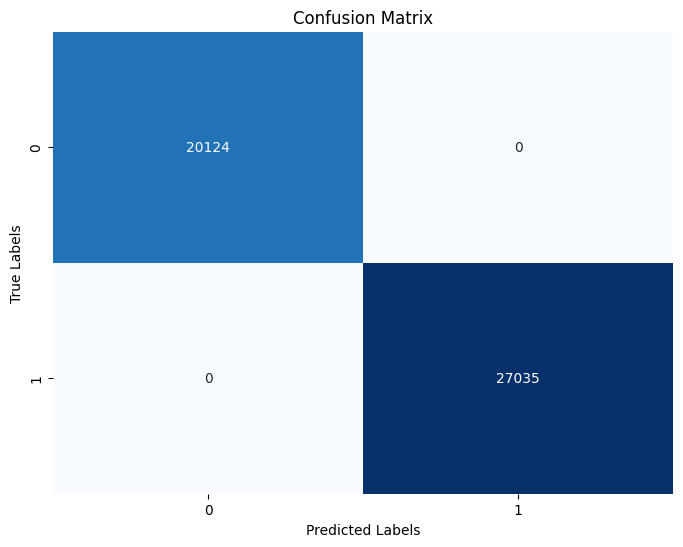

In [172]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


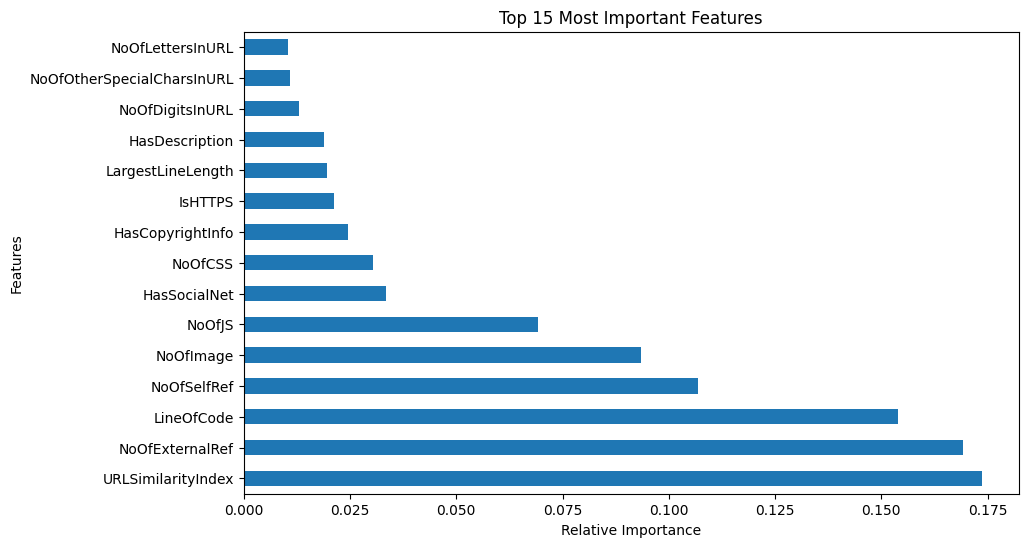

In [173]:

# Plotting feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


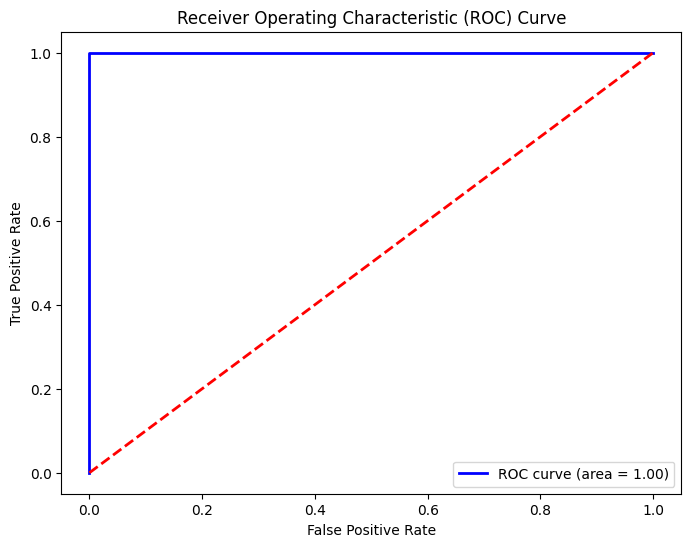

In [174]:

# Plotting ROC curve

probs = rf_classifier.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**TRYING OTHER ALGORITHM FOR COMPARING RESULTS**

**K-Nearest Neighbors (KNN):**

KNN Accuracy: 0.9985792743696855
KNN Classification Report:
                      precision    recall  f1-score   support

                   0  0.99905449116695699274 0.99761478831246275245 0.99833412068922644522     20124
                   1  0.99822642624889146301 0.99929720732383942039 0.99876152978798127258     27035

            accuracy                      0.99857927436968552115     47159
           macro avg  0.99864045870792428339 0.99845599781815108642 0.99854782523860385890     47159
        weighted avg  0.99857978358070842440 0.99857927436968552115 0.99857914295400795890     47159



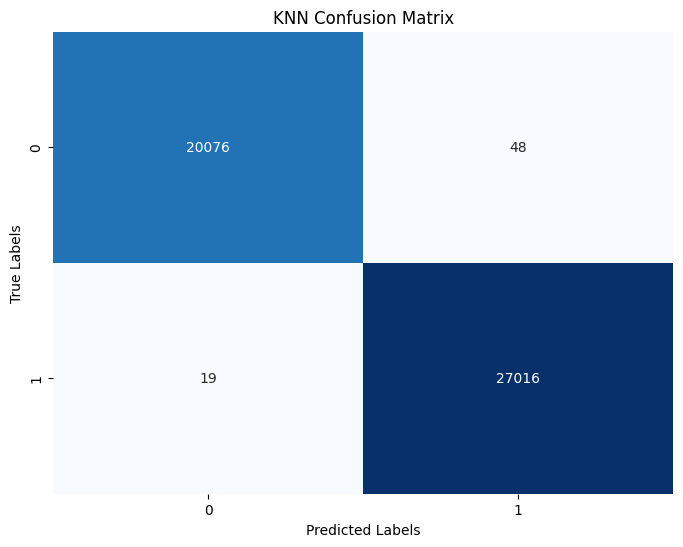

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculating the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Generate a classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Decision Trees:**

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
                      precision    recall  f1-score   support

                   0  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     20124
                   1  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     27035

            accuracy                      1.00000000000000000000     47159
           macro avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159
        weighted avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159



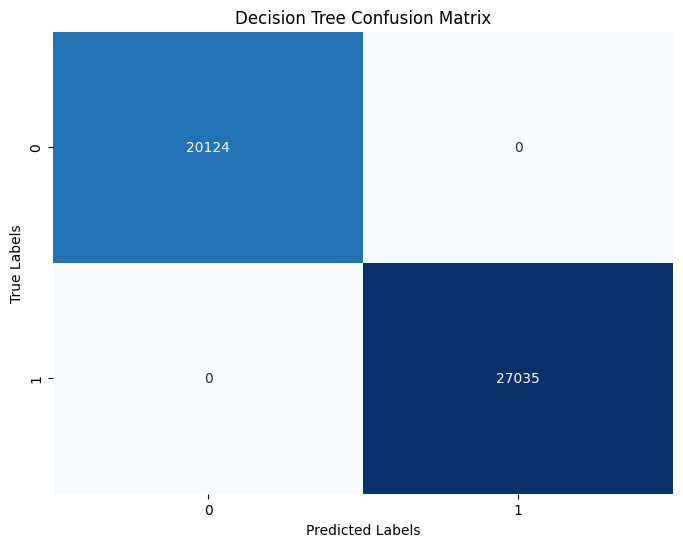

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate a classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**SVM :**

C:\Users\Earl\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


SVM Accuracy: 0.3900209928115524
SVM Classification Report:
                      precision    recall  f1-score   support

                   0  0.34515874722281947307 0.47863247863247865288 0.40108265667291276291     20124
                   1  0.45504596686230719405 0.32406140188644350086 0.37854303491185620212     27035

            accuracy                      0.39002099281155239163     47159
           macro avg  0.40010235704256336131 0.40134694025946104912 0.38981284579238451027     47159
        weighted avg  0.40815416661155867750 0.39002099281155239163 0.38816129120057102364     47159



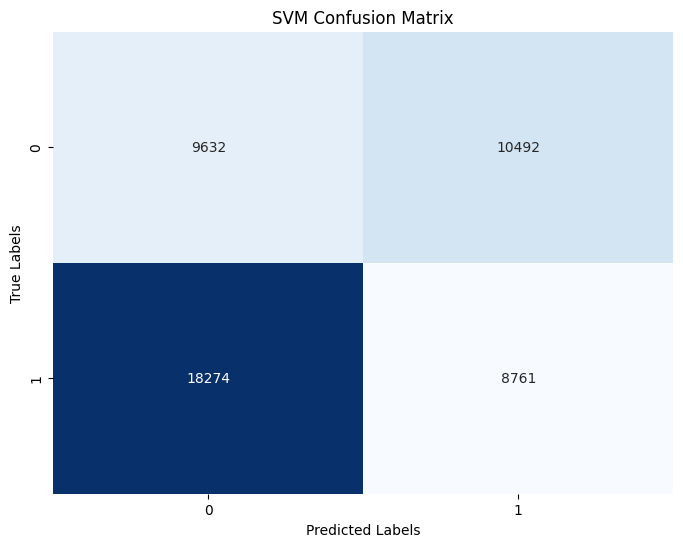

In [177]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Generate a classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Naive Bayes:**

Naive Bayes Accuracy: 0.9997031319578448
Naive Bayes Classification Report:
                      precision    recall  f1-score   support

                   0  0.99945360619908607536 0.99985092426952892897 0.99965222575516687886     20124
                   1  0.99988899988899992977 0.99959312002959122001 0.99974103806740410860     27035

            accuracy                      0.99970313195784477056     47159
           macro avg  0.99967130304404294705 0.99972202214956007449 0.99969663191128543822     47159
        weighted avg  0.99970320581754323896 0.99970313195784477056 0.99970313949085543026     47159



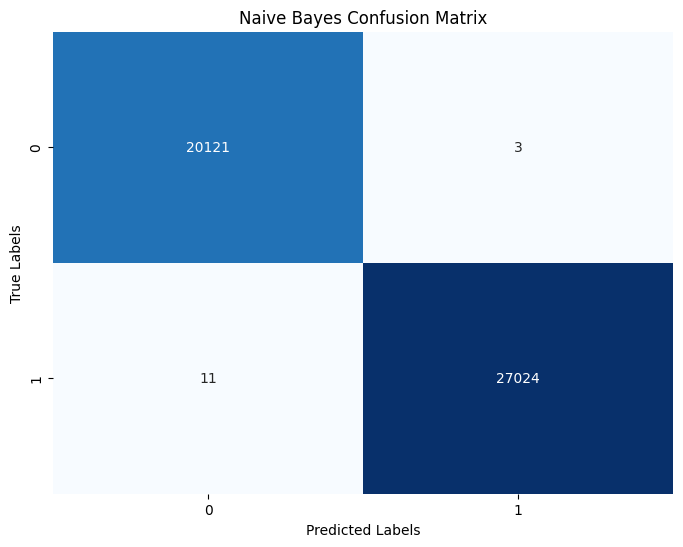

In [178]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Calculating the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Generate a classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

*Performance Comparison of Algorithms 'Precision', 'Recall', 'F1-score'*

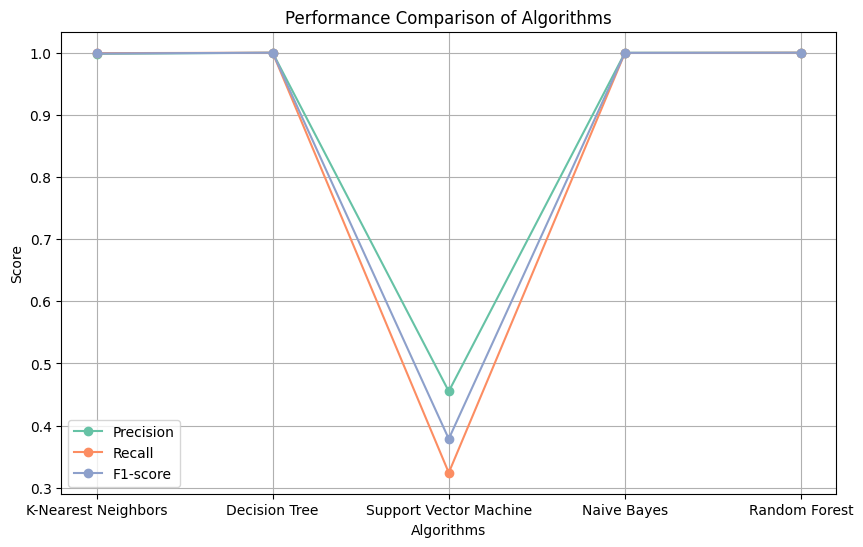

In [179]:
from sklearn.metrics import precision_recall_fscore_support

# Define a mapping between abbreviated names and full names
algorithm_names = {
    "KNN": "K-Nearest Neighbors",
    "DT": "Decision Tree",
    "SVM": "Support Vector Machine",
    "NB": "Naive Bayes",
    "Random Forest": "Random Forest"
}

# Calculate precision, recall, and F1-score for each algorithm
metrics = {}
algorithms = ["KNN", "DT", "SVM", "NB", "Random Forest"]

for alg_name in algorithms:
    if alg_name == "Random Forest":
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    else:
        y_pred_alg = locals()[f"y_pred_{alg_name.lower()}"]
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_alg, average='binary')
    metrics[alg_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1_score}

# Define pastel colors
pastel_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotting the comparison
plt.figure(figsize=(10, 6))

for i, metric in enumerate(['Precision', 'Recall', 'F1-score']):
    plt.plot([algorithm_names[alg] for alg in algorithms], [metrics[alg][metric] for alg in algorithms], marker='o', label=metric, color=pastel_colors[i % len(pastel_colors)])

plt.title('Performance Comparison of Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


### Stacking Ensemble Classifier (SVM, Naive Bayes, Random Forest -> XGBoost)

Training the Stacking Classifier...
Training complete. Time taken: 369.93 seconds

Stacking Classifier Accuracy: 0.999958

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0   1.000000  0.999901  0.999950     20124
           1   0.999926  1.000000  0.999963     27035

    accuracy                       0.999958     47159
   macro avg   0.999963  0.999950  0.999957     47159
weighted avg   0.999958  0.999958  0.999958     47159


Stacking Classifier Confusion Matrix:
[[20122     2]
 [    0 27035]]


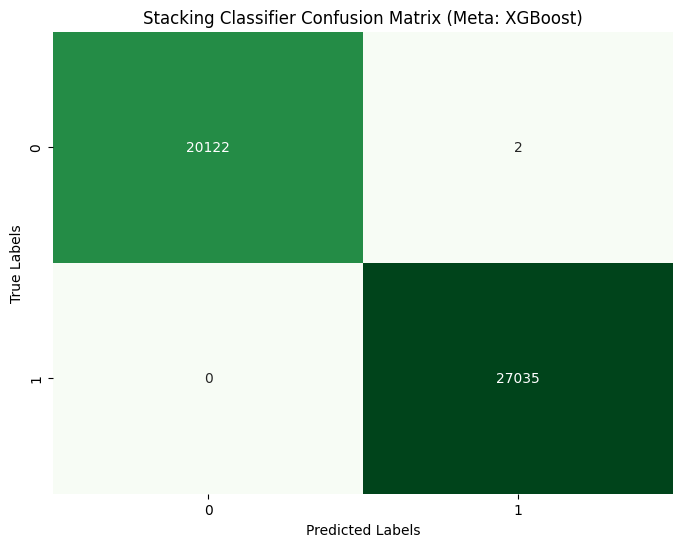

In [180]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import time # Ensure time is imported
from sklearn.linear_model import LogisticRegression 

# --- 1. Define Base Models (NEW INSTANCES) ---
# Ensure these are NEW, unfitted instances
base_models = [
    # Use probability=True for SVC if using stack_method='predict_proba'
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)) # Add other params if needed
]

# --- 2. Define Meta-Model (Unfitted Instance - this was likely OK) ---
# meta_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_model = LogisticRegression(random_state=42)


# --- 3. Create the Stacking Classifier ---
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    stack_method='predict_proba', # UNCOMMENT: Usually better performance
    cv=5,                     # 5-fold cross-validation for training meta-model
    # n_jobs=-1 # Keep commented out for now to isolate the issue
)

# --- 4. Train the Stacking Model ---
print("Training the Stacking Classifier...")
start_time = time.time()
try:
    # Ensure X_train and y_train are the correct variables from your split
    stacking_clf.fit(X_train_scaled, y_train)
    end_time = time.time()
    print(f"Training complete. Time taken: {end_time - start_time:.2f} seconds")

    # --- 5. Make Predictions ---
    y_pred_stack = stacking_clf.predict(X_test_scaled)

    # --- 6. Evaluate Performance ---
    accuracy_stack = accuracy_score(y_test, y_pred_stack)
    print(f"\nStacking Classifier Accuracy: {accuracy_stack:.6f}")

    print("\nStacking Classifier Classification Report:")
    print(classification_report(y_test, y_pred_stack, digits=6))

    print("\nStacking Classifier Confusion Matrix:")
    cm_stack = confusion_matrix(y_test, y_pred_stack)
    print(cm_stack)

    # --- 7. Visualize Confusion Matrix ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_stack, annot=True, cmap='Greens', fmt='d', cbar=False)
    plt.title('Stacking Classifier Confusion Matrix (Meta: XGBoost)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

except Exception as e:
    print(f"\nAn error occurred during stacking classifier training or evaluation: {e}")
    import traceback
    traceback.print_exc() # Print detailed traceback

In [181]:
import pickle
import time # Make sure time is imported if not already

# --- Define filename and features ---
stacking_model_filename = 'phishing_classifier.pkl'
# Get the feature names from the training data used for the stacking model
# X_train was derived from dfd after dropping correlated features and 'label'
#feature_names_list = X_train.columns.tolist()
feature_names_list = df.drop('label', axis=1).columns.tolist()


# --- Prepare the object to save ---
# We save the already trained stacking classifier and the list of feature names it expects
object_to_save = {
    'model': stacking_clf,  # The trained StackingClassifier object
    'feature_names': feature_names_list # List of feature names in the order the model expects
}

# --- Save the object to a pickle file ---
print(f"\nAttempting to save the trained stacking model and features to {stacking_model_filename}...")
try:
    start_time = time.time()
    with open(stacking_model_filename, 'wb') as file:
        pickle.dump(object_to_save, file)
    end_time = time.time()
    print(f"Successfully saved model and feature names. Time taken: {end_time - start_time:.2f} seconds")

    # --- Optional: Verification Step (Load back and check) ---
    print("\nVerifying saved file...")
    with open(stacking_model_filename, 'rb') as file: 
        loaded_object = pickle.load(file)

    # Check if keys exist and types match roughly
    if 'model' in loaded_object and 'feature_names' in loaded_object:
        print("File loaded successfully. Contains 'model' and 'feature_names' keys.")
        print(f"Number of features saved: {len(loaded_object['feature_names'])}")
       
       
    else:
        print("Verification failed: Loaded object missing expected keys.")

except Exception as e:
    print(f"\nError saving or verifying the model: {e}")


Attempting to save the trained stacking model and features to phishing_classifier.pkl...
Successfully saved model and feature names. Time taken: 0.02 seconds

Verifying saved file...
File loaded successfully. Contains 'model' and 'feature_names' keys.
Number of features saved: 50
